In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
     

df=pd.read_csv('../media/datasets/house_data.csv')
     

df.head(5)
     

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   int64  
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      1039 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Face        2211 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2211 non-null   object 
 11  Area        2211 non-null   object 
 12  Road        2211 non-null   object 
 13  Road Width  2211 non-null   object 
 14  Road Type   1426 non-null   object 
 15  Build Area  2211 non-null   object 
 16  Posted      2211 non-null   object 
 17  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 311.1+ KB


In [9]:
df1=df.drop(["Title","Year","Views","Build Area","Posted","Amenities"],axis=1)

In [10]:
df1.head(5)

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Area,Road,Road Width,Road Type
0,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
1,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
2,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
3,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
4,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped


In [11]:


df1.City.value_counts()
     


City
Kathmandu      1483
Lalitpur        432
Bhaktapur        85
Pokhara          64
Chitwan          33
Makwanpur        12
Nawalparasi      12
Dharan           11
Jhapa            10
Kavre             7
Kirtipur          7
Sunsari           7
Butwal            6
Biratnagar        6
Parsa             4
Bara              4
Dhading           4
Morang            4
Itahari           3
Kaski             3
Rupandehi         3
Birtamod          1
Nawalpur          1
Mahottari         1
Dang              1
Bardiya           1
Bhairahawa        1
Surkhet           1
Kapilvastu        1
Tanahu            1
Illam             1
Kailali           1
Name: count, dtype: int64

In [12]:
city_counts = df.City.value_counts()
values_to_drop= city_counts[city_counts < 80].index.tolist()
print(values_to_drop)


['Pokhara', 'Chitwan', 'Makwanpur', 'Nawalparasi', 'Dharan', 'Jhapa', 'Kavre', 'Kirtipur', 'Sunsari', 'Butwal', 'Biratnagar', 'Parsa', 'Bara', 'Dhading', 'Morang', 'Itahari', 'Kaski', 'Rupandehi', 'Birtamod', 'Nawalpur', 'Mahottari', 'Dang', 'Bardiya', 'Bhairahawa', 'Surkhet', 'Kapilvastu', 'Tanahu', 'Illam', 'Kailali']


In [13]:
df2= df1.loc[~df1['City'].isin(values_to_drop)]

In [14]:
df2.City.value_counts()

City
Kathmandu    1483
Lalitpur      432
Bhaktapur      85
Name: count, dtype: int64

In [15]:
column=(df2.columns.tolist())
print(column)

['Address', 'City', 'Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking', 'Face', 'Area', 'Road', 'Road Width', 'Road Type']


In [16]:
for col in column:
  num_unique = df2[col].nunique()
  print(f"Number of unique values in 'column_name': {num_unique}")
  print(f"Unique value and count of {col} in Dataframe")
  print(df2[col].value_counts())
  print("\n")

Number of unique values in 'column_name': 1396
Unique value and count of Address in Dataframe
Address
Na, Budhanilkantha, Kathmandu                             38
Budhanilkantha, Budhanilkantha, Kathmandu                 24
Hattigauda, Hattigauda, Kathmandu                         17
Basundhara, Basundhara, Kathmandu                         16
Bhaisepati, Bhaisepati, Lalitpur                          16
                                                          ..
behind budanilkantha school, Budhanilkantha, Kathmandu     1
Dachii, Mulpani, Kathmandu                                 1
jhamsikhel, Jhamsikhel, Lalitpur                           1
Ward-7 Office, Gothatar, Kathmandu                         1
Paiyatar, Kapan, Kathmandu                                 1
Name: count, Length: 1396, dtype: int64


Number of unique values in 'column_name': 3
Unique value and count of City in Dataframe
City
Kathmandu    1483
Lalitpur      432
Bhaktapur      85
Name: count, dtype: int64


Number of 

In [17]:
df2.columns.tolist()

['Address',
 'City',
 'Price',
 'Bedroom',
 'Bathroom',
 'Floors',
 'Parking',
 'Face',
 'Area',
 'Road',
 'Road Width',
 'Road Type']

In [18]:
df2.drop(["Address","Bedroom","Bathroom","Parking","Road"],axis=1,inplace=True)

C:\Users\Shubekshya\AppData\Local\Temp\ipykernel_24444\3092017312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Address","Bedroom","Bathroom","Parking","Road"],axis=1,inplace=True)


In [19]:
df2.head(10)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,1-0-0-0 Aana,20 Feet,Blacktopped
1,Kathmandu,80000000,2.0,East,0-21-0-0 Aana,20 Feet,Blacktopped
2,Kathmandu,70000000,2.0,East,1-1-0-0 Aana,20 Feet,Blacktopped
3,Kathmandu,130000000,3.0,West,0-10-1-0 Aana,20 Feet,Blacktopped
4,Kathmandu,100000000,2.0,East,0-19-2-0 Aana,20 Feet,Blacktopped
5,Kathmandu,100000000,3.0,East,0-12-3-1 Aana,13 Feet,Blacktopped
6,Lalitpur,11000000,3.0,South East,3-1-1 Aana,11 Feet,Gravelled
7,Kathmandu,50000000,2.0,East,0-8-5-0 Aana,20 Feet,Blacktopped
8,Kathmandu,100000000,3.5,North,0-12-3-2 Aana,20 Feet,Blacktopped
9,Kathmandu,32500000,2.5,South East,0-4-0-0 Aana,12 Feet,Concrete


In [22]:


# Function to convert each entry to Aana
def convert_to_aana(area):
    area = area.strip()

    # Check for "Ropani" and convert
    if "Ropani" in area:
        ropani = float(re.findall(r'\d+', area)[0])
        return ropani * 16

    # Check for "Sq. Feet" and convert to aana
    if "Sq. Feet" in area:
        # Extract the numeric part using regex
        matches = re.findall(r'\d+', area)
        if matches:  # Ensure there is at least one match
            sq_feet = float(matches[0])
            return sq_feet / 342.25  # Convert to aana

    # Check for a-b-c-d Aana format
    if re.match(r'\d+-\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        a, b, c, d = parts
        return a * 16 + b + c / 4 + d / 16

    # Check for x-y-z Aana format
    if re.match(r'\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y, z = parts
        return x + y / 4 + z / 16

    # Check for x-y Aana format
    if re.match(r'\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y = parts
        return x + y / 4

    # Check for "X Aana" format (including decimals)
    if re.match(r'^\d+\.?\d* Aana$', area):
        return float(re.findall(r'\d+\.?\d*', area)[0])

    # If none of the formats match, return "Remove"
    return "Remove"
     

df2['Area'] = df2['Area'].apply(convert_to_aana)
     


AttributeError: 'float' object has no attribute 'strip'

In [23]:
df2.head(5)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0,20 Feet,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0,20 Feet,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0,20 Feet,Blacktopped
3,Kathmandu,130000000,3.0,West,10.25,20 Feet,Blacktopped
4,Kathmandu,100000000,2.0,East,19.5,20 Feet,Blacktopped


In [24]:
df2.Area.value_counts().get('Remove',0)

np.int64(65)

In [25]:
df2 = df2[df2.Area != 'Remove']

In [26]:



df2.shape

(1935, 7)

In [27]:
nan_count = df2.isna().sum()

print(nan_count)

City             0
Price            0
Floors        1000
Face             0
Area             0
Road Width       0
Road Type      710
dtype: int64


In [31]:


def convert_to_feet(value):
    if 'Meter' in value:
        # Extract the numerical part, convert to float, and multiply by 3.28084 to convert to feet
        meters = int(float(value.replace(' Meter', '')))
        return meters * 3.28084
    elif 'Feet' in value:
        # Extract the numerical part and return as is
        return int(float(value.replace(' Feet', '')))
    else:
        return "Remove"
     

df3=df2.copy()
     

df3['Road Width'] = df3['Road Width'].apply(convert_to_feet)
     

df3[50:100]
     


,City,Price,Floors,Face,Area,Road Width,Road Type
53,Kathmandu,46000000,2.5,South West,6.75,13.00000,Concrete
54,Kathmandu,22500000,3.0,East,4.0,13.00000,NaN
55,Bhaktapur,29000000,2.0,North,4.5,20.00000,Blacktopped
56,Kathmandu,31000000,3.0,East,3.0,19.68504,Blacktopped
57,Kathmandu,42500000,NaN,West,5.3125,29.00000,NaN
58,Kathmandu,37500000,3.0,South East,5.0,0.00000,NaN
60,Kathmandu,105000000,NaN,South,64.0,20.00000,NaN
61,Kathmandu,80000000,NaN,West,9.9375,13.00000,Gravelled
62,Lalitpur,25000000,2.0,East,4.5,13.00000,Gravelled
63,Bhaktapur,32500000,2.0,South,7.0,20.00000,Paved


In [32]:

df3['Road Width'].value_counts().get('Remove',0)
     

0

In [33]:
df3.to_csv('Kathmandu_House_ Price_Prediction_CleanedData.csv', index=False)

In [34]:
df4 = pd.read_csv('Kathmandu_House_ Price_Prediction_CleanedData.csv')

In [35]:
df4.head(10)
     

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,130000000,3.0,West,10.2500,20.0,Blacktopped
4,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
5,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped
6,Lalitpur,11000000,3.0,South East,3.3125,11.0,Gravelled
7,Kathmandu,50000000,2.0,East,9.2500,20.0,Blacktopped
8,Kathmandu,100000000,3.5,North,12.8750,20.0,Blacktopped
9,Kathmandu,32500000,2.5,South East,4.0000,12.0,Concrete


In [36]:
df4["Road Type"].unique()

array([' Blacktopped', ' Gravelled', ' Concrete', ' Paved', nan,
       ' Soil Stabilized', ' Alley'], dtype=object)

In [37]:

df4=df3.loc[~df3['Road Type'].isin([' Alley'])]

In [38]:
df4.loc[df4['Road Type'].isin([' Paved', ' Concrete']), 'Road Type'] = 'Blacktopped'
df4['Road Type'] = df4['Road Type'].fillna(' Soil Stabilized')

C:\Users\Shubekshya\AppData\Local\Temp\ipykernel_24444\3805244281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Road Type'] = df4['Road Type'].fillna(' Soil Stabilized')


In [39]:
df4['Road Type'] = df4['Road Type'].str.strip()

C:\Users\Shubekshya\AppData\Local\Temp\ipykernel_24444\388227776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Road Type'] = df4['Road Type'].str.strip()


In [40]:
df4['Road Type'].value_counts()

Road Type
Soil Stabilized    846
Blacktopped        746
Gravelled          341
Name: count, dtype: int64

In [119]:
df4['Floors'].mean()

np.float64(2.911027568922306)

In [120]:
# Convert all floors to integers (round up decimals)
df4['Floors'] = np.ceil(df4['Floors']).astype(int)

In [121]:
# Create floor categories (helps models understand floor-price jumps)
df4['Floor_Category'] = pd.cut(df4['Floors'],
                             bins=[0, 1, 2, 3, 4, 5, np.inf],
                             labels=['1', '2', '3', '4', '5', '6+'])

In [122]:
# Create premium floor flag (identifies 4+ floor homes)
df4['Premium_Floor'] = (df4['Floors'] >= 4).astype(int)

In [42]:
df4['Floors'] = df4['Floors'].fillna(2.75)

C:\Users\Shubekshya\AppData\Local\Temp\ipykernel_24444\1291682311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Floors'] = df4['Floors'].fillna(2.75)


In [124]:
# ======================
# ENHANCED AREA PROCESSING  
# ======================
# Create area categories to capture non-linear relationships
df4['Area_Category'] = pd.cut(df4['Area'],
                            bins=[0, 2, 5, 10, 20, np.inf],
                            labels=['0-2', '2-5', '5-10', '10-20', '20+'])

In [128]:
# ======================
# ROAD TYPE CONSOLIDATION
# ======================
# First check and fix the column name
road_type_col = None
for col in df4.columns:
    if 'road' in col.lower() and 'type' in col.lower():
        road_type_col = col
        break

if road_type_col:
    # Standardize road types (group similar types)
    df4[road_type_col] = df4[road_type_col].replace({
        'Paved': 'Blacktopped',
        'Concrete': 'Blacktopped', 
        'Gravelled': 'Gravel',
        'Gravel': 'Gravel',  # Consistency
        'Alley': 'Soil Stabilized'
    })
    
    # Rename to standard 'Road_Type'
    df4.rename(columns={road_type_col: 'Road_Type'}, inplace=True)
else:
    print("Warning: Could not find road type column in DataFrame")
    print("Available columns:", df4.columns.tolist())

In [43]:
df4.isna().sum()

City          0
Price         0
Floors        0
Face          0
Area          0
Road Width    0
Road Type     0
dtype: int64

In [44]:
df4.to_csv('Kathmandu_House_ Price_Prediction_CleanedData1.csv', index=False)

In [45]:
df4 = pd.read_csv('Kathmandu_House_ Price_Prediction_CleanedData1.csv')

In [46]:
df4 = df4[(df4['Price'] >=10000000 ) & (df4['Price'] <=100000000 )]

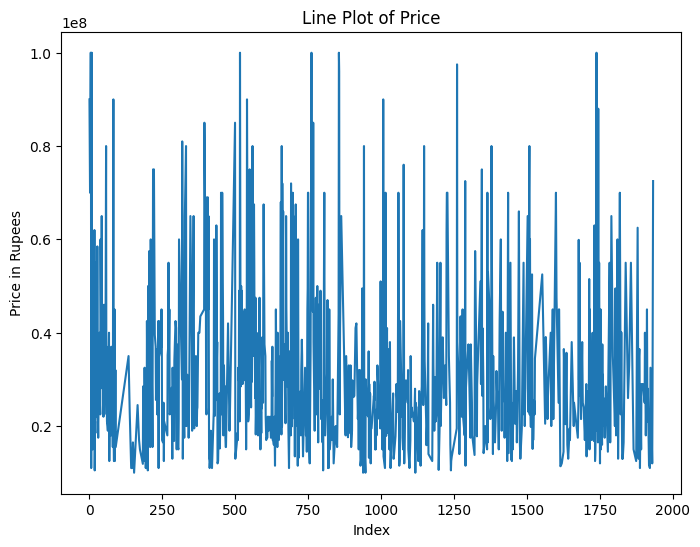

In [47]:
plt.figure(figsize=(8, 6))
df4['Price'].plot(kind='line')

# Add labels and title
plt.title('Line Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price in Rupees')

# Show the plot
plt.show()

In [ ]:
df4.reset_index(drop=True, inplace=True)

In [ ]:
df4.shape

(915, 7)

In [ ]:
print(df4.index)
     

RangeIndex(start=0, stop=915, step=1)


In [ ]:
df4.head()

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
4,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped


In [ ]:
df4 = df4[~((df4['Price'] > 20000000) & (df4['Floors'] < 2) & (df4['Area'] < 4))]
df4 = df4[~((df4['Price'] > 20000000) & (df4['Area'] < 2.5))]
df4 = df4[~((df4['Price'] > 50000000) & (df4['Floors'] < 3) & (df4['Area'] < 5))]
df4 = df4[~((df4['Price'] < 50000000) & (df4['Area'] > 15))]
df4 = df4[~((df4['Price'] < 16000000) & (df4['Floors'] > 2.5))]

In [48]:
df4.shape

(915, 7)

In [ ]:
df4.head(50)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.00,West,16.0000,20.00000,Blacktopped
1,Kathmandu,80000000,2.00,East,21.0000,20.00000,Blacktopped
2,Kathmandu,70000000,2.00,East,17.0000,20.00000,Blacktopped
3,Kathmandu,100000000,2.00,East,19.5000,20.00000,Blacktopped
4,Kathmandu,100000000,3.00,East,12.8125,13.00000,Blacktopped
6,Kathmandu,50000000,2.00,East,9.2500,20.00000,Blacktopped
7,Kathmandu,100000000,3.50,North,12.8750,20.00000,Blacktopped
8,Kathmandu,32500000,2.50,South East,4.0000,12.00000,Blacktopped
9,Kathmandu,39900000,3.00,North West,4.5000,14.00000,Blacktopped
10,Kathmandu,15000000,1.00,South,5.0000,12.00000,Gravelled


In [49]:
df_perAana = pd.DataFrame({'Price_per_aana': df4['Price'] / df4['Area']})

In [50]:
df_perAana.head(5)

,Price_per_aana
0,5.625000e+06
1,3.809524e+06
2,4.117647e+06
4,5.128205e+06
5,7.804878e+06


In [51]:
df_perAana.replace([float('inf'), -float('inf')], np.nan, inplace=True)
df_perAana.dropna(inplace=True)

In [53]:
# Check for NaN values
nan_count = df_perAana['Price_per_aana'].isna().sum()
print(f"Number of NaN values: {nan_count}")

# Check for infinite values
inf_count = (df_perAana['Price_per_aana'] == float('inf')).sum()
print(f"Number of infinite values: {inf_count}")

Number of NaN values: 0
Number of infinite values: 0


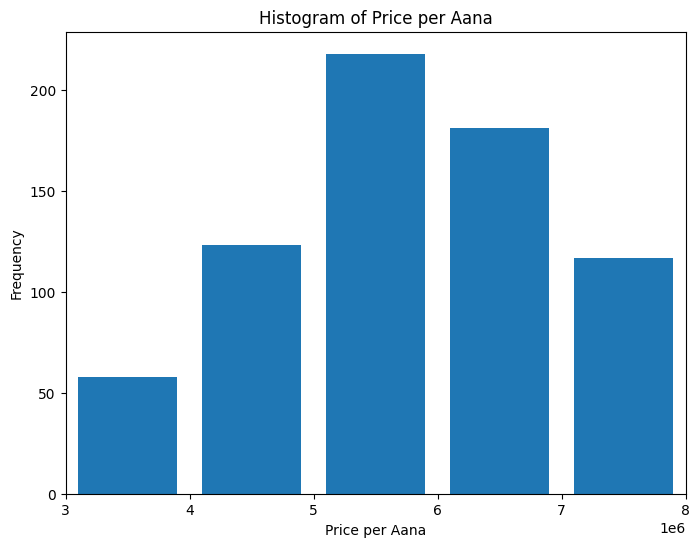

In [ ]:
plt.figure(figsize=(8, 6))
bins = [3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
plt.hist(df_perAana['Price_per_aana'], bins = bins,rwidth=0.8)
plt.xlim(3000000, 8000000)
plt.title('Histogram of Price per Aana')
plt.xlabel('Price per Aana')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df4.to_csv('Kathmandu_House_ Price_Prediction_CleanedData2.csv', index=False)

In [54]:
df4.shape

(915, 7)

In [55]:
df4 = pd.read_csv('Kathmandu_House_ Price_Prediction_CleanedData2.csv')
df4 = df4[~((df4['Area'] < 2.0))]
df4.columns = df4.columns.str.replace(' ', '_')
df4.columns

Index(['City', 'Price', 'Floors', 'Face', 'Area', 'Road_Width', 'Road_Type'], dtype='object')

In [56]:
df4.head(5)

,City,Price,Floors,Face,Area,Road_Width,Road_Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
4,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped


Text(0, 0.5, 'Average Price')

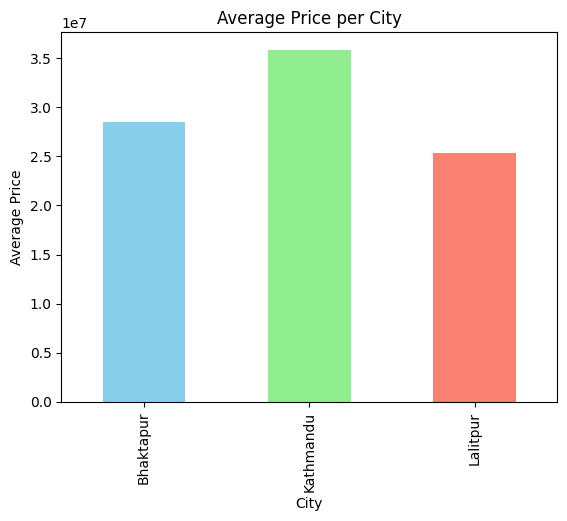

In [57]:
avg_price_per_city = df4.groupby('City')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

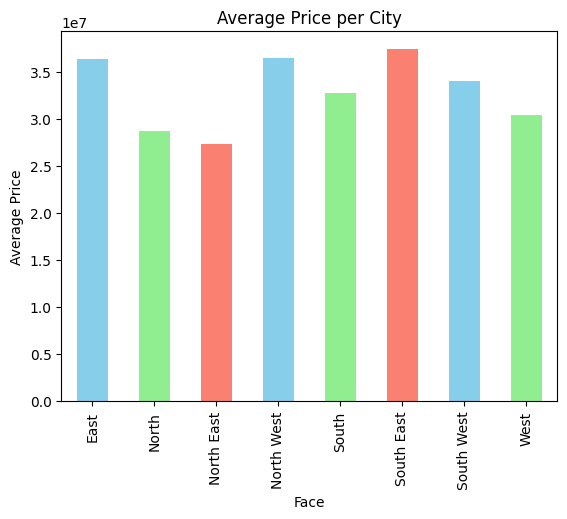

In [58]:
avg_price_per_city = df4.groupby('Face')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('Face')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

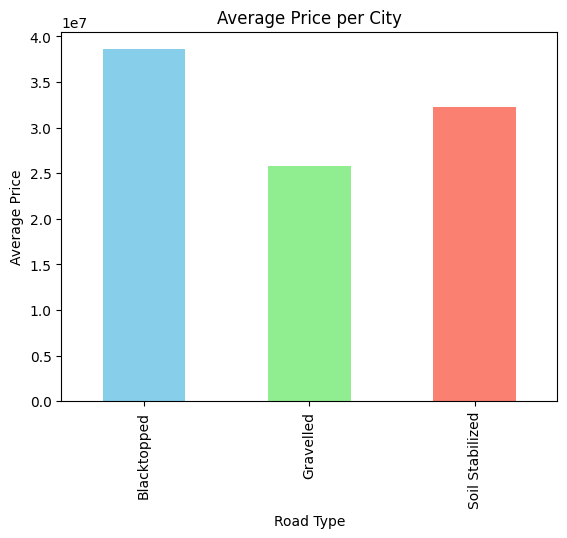

In [ ]:
avg_price_per_city = df4.groupby('Road_Type')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('Road Type')
plt.ylabel('Average Price')

In [59]:
print(df4.dtypes)

City           object
Price           int64
Floors        float64
Face           object
Area          float64
Road_Width    float64
Road_Type      object
dtype: object


In [60]:
df4.drop('Face',axis=1,inplace=True)
# Apply one-hot encoding to only 'City' and 'Road Type'
encoded_columns = pd.get_dummies(df4[['City', 'Road_Type']], dtype=int)

# Drop the original 'City' and 'Road Type' columns
df4 = df4.drop(['City', 'Road_Type'], axis=1)

# Concatenate the one-hot encoded columns to the DataFrame
df4 = pd.concat([df4, encoded_columns], axis=1)

In [61]:

df4.head()

,Price,Floors,Area,Road_Width,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road_Type_Blacktopped,Road_Type_Gravelled,Road_Type_Soil Stabilized
0,90000000,2.0,16.0000,20.0,0,1,0,1,0,0
1,80000000,2.0,21.0000,20.0,0,1,0,1,0,0
2,70000000,2.0,17.0000,20.0,0,1,0,1,0,0
3,100000000,2.0,19.5000,20.0,0,1,0,1,0,0
4,100000000,3.0,12.8125,13.0,0,1,0,1,0,0


In [62]:
print(df4.dtypes)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df4['Price'] = scaler.fit_transform(df4[['Price']])

Price                          int64
Floors                       float64
Area                         float64
Road_Width                   float64
City_Bhaktapur                 int64
City_Kathmandu                 int64
City_Lalitpur                  int64
Road_Type_Blacktopped          int64
Road_Type_Gravelled            int64
Road_Type_Soil Stabilized      int64
dtype: object


In [63]:

# Ensure 'Road_Width' and 'Price' are numeric
df4['Road_Width'] = pd.to_numeric(df4['Road_Width'], errors='coerce')
df4['Price'] = pd.to_numeric(df4['Price'], errors='coerce')

# Compute mean of valid 'Road_Width' values (≤ 50) to replace outliers
valid_values = df4.loc[df4['Road_Width'] <= 50, 'Road_Width']
mean_value = valid_values.mean() if not valid_values.empty else 50  # Fallback if needed

# Replace values > 50 with the computed mean
df4.loc[df4['Road_Width'] > 50, 'Road_Width'] = mean_value

# Handle '0' values in 'Road_Width' based on 'Price' (group-wise mean)
df4.loc[df4['Road_Width'] == 0, 'Road_Width'] = df4.groupby('Price')['Road_Width'].transform(lambda x: x.replace(0, x.mean()))

# Fill remaining '0' values (if any groups had all zeros) with overall mean
df4['Road_Width'] = df4['Road_Width'].replace(0, df4['Road_Width'].mean())


In [ ]:
df4.head()

,Price,Floors,Area,Road_Width,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road_Type_Blacktopped,Road_Type_Gravelled,Road_Type_Soil Stabilized
0,90000000,2.0,16.0000,20.0,0,1,0,1,0,0
1,80000000,2.0,21.0000,20.0,0,1,0,1,0,0
2,70000000,2.0,17.0000,20.0,0,1,0,1,0,0
3,100000000,2.0,19.5000,20.0,0,1,0,1,0,0
4,100000000,3.0,12.8125,13.0,0,1,0,1,0,0


In [ ]:
df4.to_csv('../media/datasets/Final_cleaned_encoded_data.csv', index=False)
print("Data cleaning and preprocessing completed successfully!")

Data cleaning and preprocessing completed successfully!


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# def comprehensive_data_analysis(csv_path='Final_cleaned_encoded_data.csv'):
#     # Load the data
#     df = pd.read_csv(csv_path)
    
#     # Basic data information
#     print("Dataset Information:")
#     print(f"Total Rows: {len(df)}")
#     print(f"Columns: {df.columns.tolist()}")
    
#     # Separate features and target
#     target_column = 'Price'
#     feature_columns = [col for col in df.columns if col != target_column]
    
#     # Original price distribution (before log transformation)
#     original_prices = np.expm1(df[target_column])
    
#     # Visualize price distribution
#     plt.figure(figsize=(12, 5))
    
#     plt.subplot(1, 2, 1)
#     original_prices.hist(bins=50)
#     plt.title('Original Price Distribution')
#     plt.xlabel('Price (Rs)')
#     plt.ylabel('Frequency')
    
#     plt.subplot(1, 2, 2)
#     df[target_column].hist(bins=50)
#     plt.title('Log-transformed Price Distribution')
#     plt.xlabel('Log(Price)')
#     plt.ylabel('Frequency')
    
#     plt.tight_layout()
#     plt.show()
    
#     # Price statistics
#     print("\nPrice Statistics:")
#     print("Original Prices:")
#     print(original_prices.describe())
    
#     print("\nLog-transformed Prices:")
#     print(df[target_column].describe())
    
#     # Feature correlation with price
#     correlation = df[feature_columns + [target_column]].corr()[target_column].sort_values(ascending=False)
#     print("\nFeature Correlation with Price:")
#     print(correlation)
    
#     # Correlation heatmap
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(df[feature_columns + [target_column]].corr(), 
#                 annot=True, 
#                 cmap='coolwarm', 
#                 center=0)
#     plt.title('Feature Correlation Heatmap')
#     plt.tight_layout()
#     plt.show()
    
#     # Boxplot of features
#     plt.figure(figsize=(15, 6))
#     df[feature_columns].boxplot()
#     plt.title('Feature Distribution')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Run the analysis
# comprehensive_data_analysis()

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Floors', y='Price', data=data)
plt.title('House Price vs Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()


: 

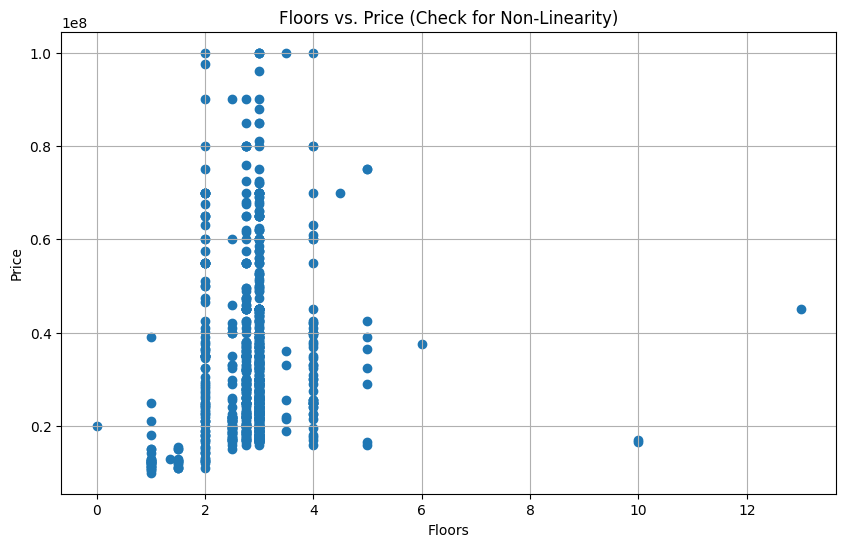

Floors value counts:
 Floors
0.00       1
1.00      27
1.35       1
1.50      14
2.00      94
2.50      53
2.75     162
3.00     376
3.50       7
4.00      50
4.50       1
5.00       9
6.00       1
10.00      2
13.00      1
Name: count, dtype: int64


In [64]:

# Plot Floors vs. Price (add this after df4 is cleaned)
plt.figure(figsize=(10, 6))
plt.scatter(df4["Floors"], df4["Price"])
plt.title("Floors vs. Price (Check for Non-Linearity)")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.grid()
plt.show()

# Check distribution of Floors
print("Floors value counts:\n", df4["Floors"].value_counts().sort_index())

In [65]:
import numpy as np

# Convert decimal floors to whole numbers (round up)
df4['Floors'] = np.ceil(df4['Floors']).clip(lower=1)

# Bin rare floor counts
df4['Floors_binned'] = pd.cut(df4['Floors'],
                             bins=[0, 1, 2, 3, 4, 5, np.inf],
                             labels=['1', '2', '3', '4', '5', '6+'])

# Remove extreme outliers
df4 = df4[df4['Floors'] <= 10]  # Remove 13-floor outlier

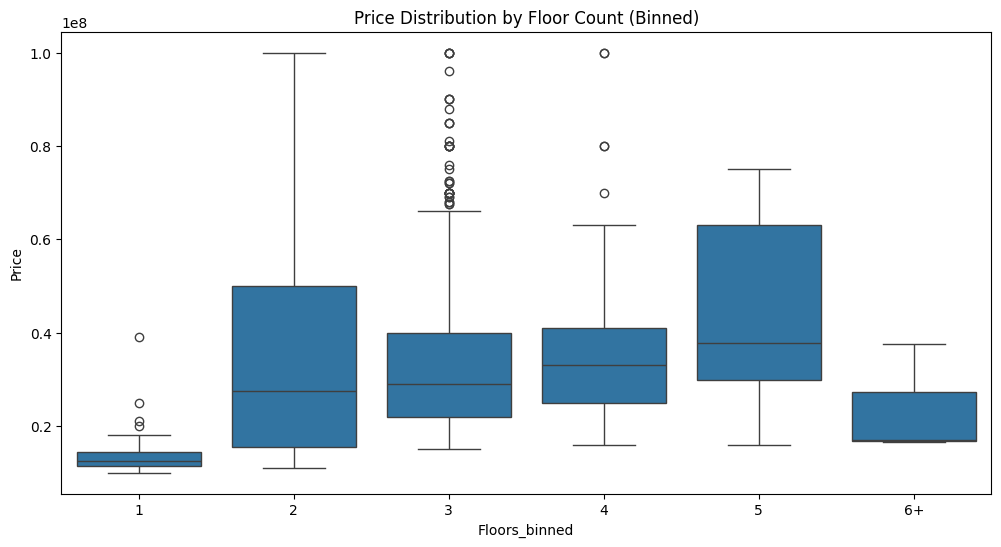

In [67]:
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.boxplot(x='Floors_binned', y='Price', data=df4)
plt.title('Price Distribution by Floor Count (Binned)')
plt.show()

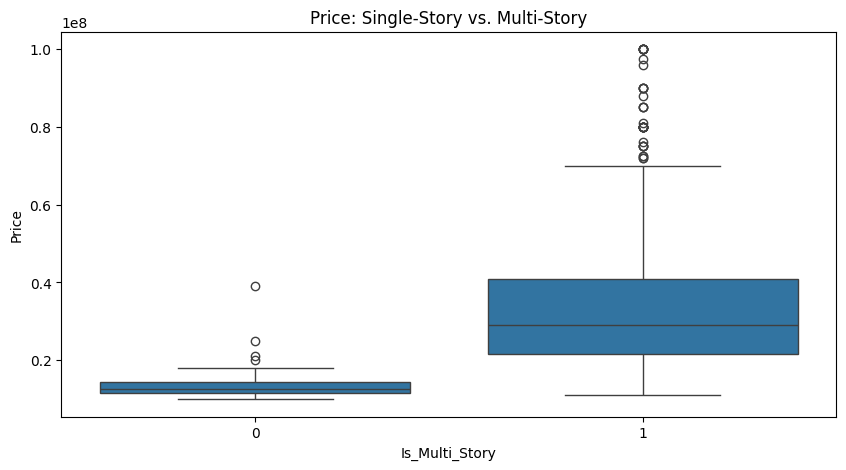

In [68]:
# Best for Decision Tree
df4['Is_Multi_Story'] = (df4['Floors'] > 1).astype(int)

# Verify impact
plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Multi_Story', y='Price', data=df4)
plt.title('Price: Single-Story vs. Multi-Story')
plt.show()

In [69]:
from sklearn.tree import DecisionTreeRegressor

# Use binned floors as categorical
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(pd.get_dummies(df4[['Floors_binned', 'Area']]), df4['Price'])

DecisionTreeRegressor(max_depth=5)

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on training data (or test data if you have a split)
y_pred = tree.predict(pd.get_dummies(df4[['Floors_binned', 'Area']]))

# Calculate metrics
print("MAE:", mean_absolute_error(df4['Price'], y_pred))
print("R² Score:", r2_score(df4['Price'], y_pred))

MAE: 6151982.564259653
R² Score: 0.7697023366392619


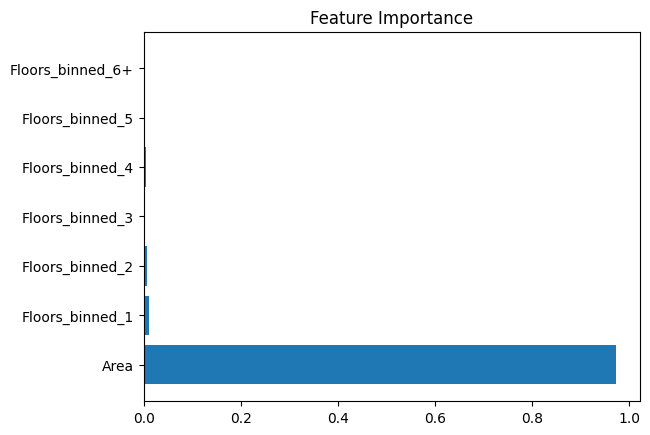

In [71]:
import matplotlib.pyplot as plt

# Get feature importance
importance = tree.feature_importances_
features = pd.get_dummies(df4[['Floors_binned', 'Area']]).columns

# Plot
plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [96]:
df = pd.read_csv('Final_cleaned_encoded_data.csv')

# Define features (use the one-hot encoded columns)
features = [
    'Area', 
    'Floors', 
    'Road_Width',
    'City_Bhaktapur', 
    'City_Kathmandu', 
    'City_Lalitpur',
    'Road_Type_Blacktopped', 
    'Road_Type_Gravelled', 
    'Road_Type_Soil Stabilized'
]

X = df[features]
y = df['Price']

In [97]:
# 2. Define features correctly (using existing one-hot encoded columns)
numeric_features = ['Area', 'Floors', 'Road_Width']
categorical_features = [
    'City_Bhaktapur', 'City_Kathmandu', 'City_Lalitpur',
    'Road_Type_Blacktopped', 'Road_Type_Gravelled', 'Road_Type_Soil Stabilized'
]
features = numeric_features + categorical_features

X = df[features]
y = df['Price']


In [98]:
# 3. Simplified preprocessing (only scale numeric features)
scaler = StandardScaler()

In [99]:
# 3. Create models
scaler = StandardScaler()

# SVM model (only uses numeric features)
svm_model = Pipeline([
    ('scaler', scaler),
    ('regressor', SVR(kernel='rbf', C=10))
])

# Decision Tree (uses all features)
tree_model = DecisionTreeRegressor(max_depth=5)

In [100]:
# 4. Train models
svm_model.fit(X[numeric_features], y)
tree_model.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# 5. Train models
svm_model.fit(X[numeric_features], y)  # Only scale numeric features
tree_model.fit(X, y)  # Decision tree uses all features


In [129]:
# 6. Example usage
prediction = predict_price(
    area=5.0,
    floors=10=7,
    road_width=10.0,
    city='Kathmandu',
    road_type='Blacktopped'
)

print("House Price Prediction Results:")
for model, price in prediction.items():
    print(f"{model}: {price}")

SyntaxError: invalid syntax (1262182382.py, line 4)

In [123]:
# ======================
# ENHANCED AREA PROCESSING  
# ======================
# Create area categories to capture non-linear relationships
df4['Area_Category'] = pd.cut(df4['Area'],
                            bins=[0, 2, 5, 10, 20, np.inf],
                            labels=['0-2', '2-5', '5-10', '10-20', '20+'])